In [43]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [44]:
# Let's load the dataset.

df_brazil = pd.read_excel('covid19_brazil_dataset.xlsx')
df_brazil

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Let's check the columns of this dataset.

for col in df_brazil.columns: 
    print(col) 

Patient ID
Patient age quantile
SARS-Cov-2 exam result
Patient addmited to regular ward (1=yes, 0=no)
Patient addmited to semi-intensive unit (1=yes, 0=no)
Patient addmited to intensive care unit (1=yes, 0=no)
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)
Serum Glucose
Respiratory Syncytial Virus
Influenza A
Influenza B
Parainfluenza 1
CoronavirusNL63
Rhinovirus/Enterovirus
Mycoplasma pneumoniae
Coronavirus HKU1
Parainfluenza 3
Chlamydophila pneumoniae
Adenovirus
Parainfluenza 4
Coronavirus229E
CoronavirusOC43
Inf A H1N1 2009
Bordetella pertussis
Metapneumovirus
Parainfluenza 2
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Influenza B, rapid test
Influenza A, rapid test
Alanine transaminase
Aspartate transaminase
Gamma-glutamyltransfe

In [46]:
# let's check the shape of the dataset.

df_brazil.shape

(5644, 111)

In [47]:
# Let's check the data type of each attribute in the dataset.

df_brazil.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [48]:
# Replacing the space to "_" in each column name/head.

df_brazil.columns = df_brazil.columns.str.replace(" ","_")
print(df_brazil.columns)

Index(['Patient_ID', 'Patient_age_quantile', 'SARS-Cov-2_exam_result',
       'Patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean_platelet_volume_',
       ...
       'Hb_saturation_(arterial_blood_gases)',
       'pCO2_(arterial_blood_gas_analysis)',
       'Base_excess_(arterial_blood_gas_analysis)',
       'pH_(arterial_blood_gas_analysis)',
       'Total_CO2_(arterial_blood_gas_analysis)',
       'HCO3_(arterial_blood_gas_analysis)',
       'pO2_(arterial_blood_gas_analysis)', 'Arteiral_Fio2', 'Phosphor',
       'ctO2_(arterial_blood_gas_analysis)'],
      dtype='object', length=111)


In [49]:
# Let's check the categorical data.

df_cat = df_brazil.select_dtypes(include='object')
print("No. columns having 'object' data type :\n")
df_cat.columns

No. columns having 'object' data type :



Index(['Patient_ID', 'SARS-Cov-2_exam_result', 'Respiratory_Syncytial_Virus',
       'Influenza_A', 'Influenza_B', 'Parainfluenza_1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_3',
       'Chlamydophila_pneumoniae', 'Adenovirus', 'Parainfluenza_4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009',
       'Bordetella_pertussis', 'Metapneumovirus', 'Parainfluenza_2',
       'Influenza_B,_rapid_test', 'Influenza_A,_rapid_test', 'Strepto_A',
       'Urine_-_Esterase', 'Urine_-_Aspect', 'Urine_-_pH',
       'Urine_-_Hemoglobin', 'Urine_-_Bile_pigments', 'Urine_-_Ketone_Bodies',
       'Urine_-_Nitrite', 'Urine_-_Urobilinogen', 'Urine_-_Protein',
       'Urine_-_Leukocytes', 'Urine_-_Crystals', 'Urine_-_Hyaline_cylinders',
       'Urine_-_Granular_cylinders', 'Urine_-_Yeasts', 'Urine_-_Color'],
      dtype='object')

In [50]:
# Let's check the numeric data.

df_num = df_brazil.select_dtypes(exclude='object')
df_num.columns

Index(['Patient_age_quantile',
       'Patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean_platelet_volume_', 'Red_blood_Cells',
       'Lymphocytes', 'Mean_corpuscular_hemoglobin_concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_(MCH)',
       'Eosinophils', 'Mean_corpuscular_volume_(MCV)', 'Monocytes',
       'Red_blood_cell_distribution_width_(RDW)', 'Serum_Glucose',
       'Mycoplasma_pneumoniae', 'Neutrophils', 'Urea',
       'Proteina_C_reativa_mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine_transaminase', 'Aspartate_transaminase',
       'Gamma-glutamyltransferase ', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Indirect_Bilirubin', 'Alkaline_phosphatase', 'Ionized_calcium ',
       'Magnesium', 'pCO2_(venous_blood_gas_analysis)',
       'Hb_saturation_(

In [51]:
# Dropping the 'Patient ID' as every patient is having the unique id.

df_brazil = df_brazil.drop(['Patient_ID'], axis=1)
df_brazil.head(2)

,Patient_age_quantile,SARS-Cov-2_exam_result,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,...,Hb_saturation_(arterial_blood_gases),pCO2_(arterial_blood_gas_analysis),Base_excess_(arterial_blood_gas_analysis),pH_(arterial_blood_gas_analysis),Total_CO2_(arterial_blood_gas_analysis),HCO3_(arterial_blood_gas_analysis),pO2_(arterial_blood_gas_analysis),Arteiral_Fio2,Phosphor,ctO2_(arterial_blood_gas_analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CHECKING THE COLUMNS BEING WHOLLY NULL

In [10]:
full_null_series = (df_brazil.isnull().sum() == df_brazil.shape[0])
full_null_columns = full_null_series[full_null_series == True].index

# columns with all values equal null
print(full_null_columns.tolist())

['Mycoplasma_pneumoniae', 'Urine_-_Sugar', 'Partial_thromboplastin_time\xa0(PTT)\xa0', 'Prothrombin_time_(PT),_Activity', 'D-Dimer']


In [11]:
# Dropping the columns 

df_brazil.drop(full_null_columns, axis=1, inplace=True)

#### Convertig the data type

In [12]:
df_brazil['SARS-Cov-2_exam_result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2_exam_result, dtype: int64

In [13]:
# Replacing the values of SARS-Cov-2_exam_result as :
# 0 = negative and 1 = positive
# Checking the head after replacing.

df_brazil['SARS-Cov-2_exam_result'] = df_brazil['SARS-Cov-2_exam_result'].replace({"negative":0, "positive":1})
df_brazil['SARS-Cov-2_exam_result'].head()

0    0
1    0
2    0
3    0
4    0
Name: SARS-Cov-2_exam_result, dtype: int64

#### CHECKING THE NULL VALUES

In [14]:
for i in df_brazil.columns:
    x = df_brazil[i].isnull().sum()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Patient_age_quantile --------
 0


-------- SARS-Cov-2_exam_result --------
 0


-------- Patient_addmited_to_regular_ward_(1=yes,_0=no) --------
 0


-------- Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no) --------
 0


-------- Patient_addmited_to_intensive_care_unit_(1=yes,_0=no) --------
 0


-------- Hematocrit --------
 5041


-------- Hemoglobin --------
 5041


-------- Platelets --------
 5042


-------- Mean_platelet_volume_ --------
 5045


-------- Red_blood_Cells --------
 5042


-------- Lymphocytes --------
 5042


-------- Mean_corpuscular_hemoglobin_concentration (MCHC) --------
 5042


-------- Leukocytes --------
 5042


-------- Basophils --------
 5042


-------- Mean_corpuscular_hemoglobin_(MCH) --------
 5042


-------- Eosinophils --------
 5042


-------- Mean_corpuscular_volume_(MCV) --------
 5042


-------- Monocytes --------
 5043


-------- Red_blood_cell_distribution_width_(RDW) --------
 5042


-------- Serum_Glucose --------
 5436


----

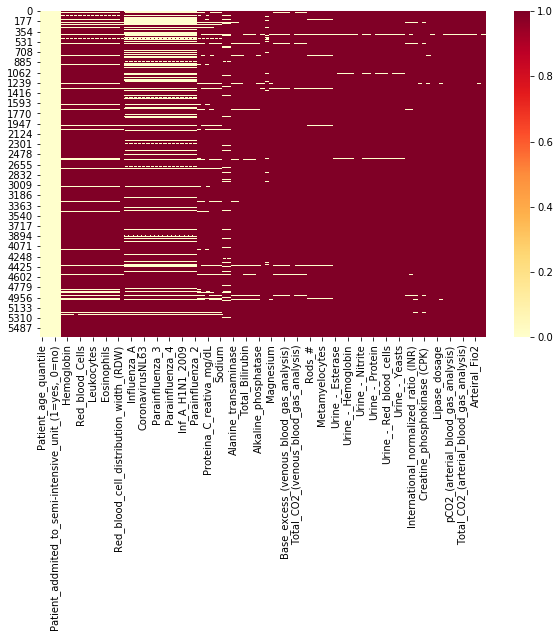

In [15]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df_brazil.isnull(), cmap = 'YlOrRd')

In [16]:
# CReating a copy of the original dataset.

df_brazil_covid = df_brazil.copy()
df_brazil_covid['count'] = 1

In [17]:
#create a list of columns with datatype == 'object'
x1=[]
for c in df_brazil.columns:
    x=df_brazil[c].dtype
    if x == 'object' and c != 'Patient ID':
        x1.append(c)
print(x1)

['Respiratory_Syncytial_Virus', 'Influenza_A', 'Influenza_B', 'Parainfluenza_1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_3', 'Chlamydophila_pneumoniae', 'Adenovirus', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Bordetella_pertussis', 'Metapneumovirus', 'Parainfluenza_2', 'Influenza_B,_rapid_test', 'Influenza_A,_rapid_test', 'Strepto_A', 'Urine_-_Esterase', 'Urine_-_Aspect', 'Urine_-_pH', 'Urine_-_Hemoglobin', 'Urine_-_Bile_pigments', 'Urine_-_Ketone_Bodies', 'Urine_-_Nitrite', 'Urine_-_Urobilinogen', 'Urine_-_Protein', 'Urine_-_Leukocytes', 'Urine_-_Crystals', 'Urine_-_Hyaline_cylinders', 'Urine_-_Granular_cylinders', 'Urine_-_Yeasts', 'Urine_-_Color']


In [18]:
#check unique values on list

for a in x1:
    print('----', a, '----')
    print(df_brazil[a].unique())
    print()

---- Respiratory_Syncytial_Virus ----
[nan 'not_detected' 'detected']

---- Influenza_A ----
[nan 'not_detected' 'detected']

---- Influenza_B ----
[nan 'not_detected' 'detected']

---- Parainfluenza_1 ----
[nan 'not_detected' 'detected']

---- CoronavirusNL63 ----
[nan 'not_detected' 'detected']

---- Rhinovirus/Enterovirus ----
[nan 'detected' 'not_detected']

---- Coronavirus_HKU1 ----
[nan 'not_detected' 'detected']

---- Parainfluenza_3 ----
[nan 'not_detected' 'detected']

---- Chlamydophila_pneumoniae ----
[nan 'not_detected' 'detected']

---- Adenovirus ----
[nan 'not_detected' 'detected']

---- Parainfluenza_4 ----
[nan 'not_detected' 'detected']

---- Coronavirus229E ----
[nan 'not_detected' 'detected']

---- CoronavirusOC43 ----
[nan 'not_detected' 'detected']

---- Inf_A_H1N1_2009 ----
[nan 'not_detected' 'detected']

---- Bordetella_pertussis ----
[nan 'not_detected' 'detected']

---- Metapneumovirus ----
[nan 'not_detected' 'detected']

---- Parainfluenza_2 ----
[nan 'not

In [19]:
#replace some datas

df_brazil=df_brazil.replace(['positive','negative','not_detected','detected','not_done','absent','Não Realizado','present','normal'],
                  [1,0,0,1,np.nan,0,np.nan,1,0])
df_brazil['Urine_-_Leukocytes'].replace('<1000', '999', inplace=True)
df_brazil['Urine_-_pH'] = df_brazil['Urine_-_pH'].astype("float64")
df_brazil['Urine_-_Leukocytes'] = df_brazil['Urine_-_Leukocytes'].astype("float64")
df_brazil['Urine_-_Urobilinogen'] = df_brazil['Urine_-_Urobilinogen'].astype("float64")

In [20]:
#replace nan by 0

df_brazil = df_brazil.fillna(0)

In [21]:
# Making dummies variable from categorical

#create dataframe with dummies
data_dummies=pd.get_dummies(df_brazil[x1])
data_dummies.head()

,Respiratory_Syncytial_Virus,Influenza_A,Influenza_B,Parainfluenza_1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus_HKU1,Parainfluenza_3,Chlamydophila_pneumoniae,Adenovirus,...,Urine_-_Crystals_Ausentes,Urine_-_Crystals_Oxalato de Cálcio +++,Urine_-_Crystals_Oxalato de Cálcio -++,Urine_-_Crystals_Urato Amorfo +++,Urine_-_Crystals_Urato Amorfo --+,Urine_-_Color_0,Urine_-_Color_citrus_yellow,Urine_-_Color_light_yellow,Urine_-_Color_orange,Urine_-_Color_yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#create dataframe without dtypes object

df_brazil = pd.concat([df_brazil['SARS-Cov-2_exam_result'], df_num, data_dummies], axis=1)

In [23]:
#check if have columns empty

df_brazil.describe(include="all").T.round().sort_values('max', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Urine_-_Ketone_Bodies,5644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Parainfluenza_2,5644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urine_-_Hyaline_cylinders,5644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urine_-_Protein,5644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urine_-_Urobilinogen,5644.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Mycoplasma_pneumoniae,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urine_-_Sugar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partial_thromboplastin_time (PTT),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Prothrombin_time_(PT),_Activity",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#remove columns without data

#create a list of columns

list_empty = df_brazil[df_brazil.sum()[(df_brazil.sum() == 0)].index].columns
print(list_empty)

Index(['Mycoplasma_pneumoniae', 'Fio2_(venous_blood_gas_analysis)',
       'Myeloblasts', 'Urine_-_Sugar', 'Partial_thromboplastin_time (PTT) ',
       'Prothrombin_time_(PT),_Activity', 'D-Dimer', 'Parainfluenza_2',
       'Urine_-_Esterase', 'Urine_-_Bile_pigments', 'Urine_-_Ketone_Bodies',
       'Urine_-_Nitrite', 'Urine_-_Urobilinogen', 'Urine_-_Protein',
       'Urine_-_Hyaline_cylinders', 'Urine_-_Granular_cylinders',
       'Urine_-_Yeasts'],
      dtype='object')


In [25]:
#create a dataframe without empty data

df_brazil = df_brazil.drop(list_empty,axis=1)
df_brazil.shape

(5644, 106)

In [26]:
df_brazil.head()

,SARS-Cov-2_exam_result,Patient_age_quantile,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,...,Urine_-_Crystals_Ausentes,Urine_-_Crystals_Oxalato de Cálcio +++,Urine_-_Crystals_Oxalato de Cálcio -++,Urine_-_Crystals_Urato Amorfo +++,Urine_-_Crystals_Urato Amorfo --+,Urine_-_Color_0,Urine_-_Color_citrus_yellow,Urine_-_Color_light_yellow,Urine_-_Color_orange,Urine_-_Color_yellow
0,0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1,0,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0,0,0,0,0,1,0,0,0,0
2,0,8,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
4,0,15,0,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [27]:
#replace nan by 0

df_brazil = df_brazil.fillna(0)

In [28]:
df_brazil.head()

,SARS-Cov-2_exam_result,Patient_age_quantile,"Patient_addmited_to_regular_ward_(1=yes,_0=no)","Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,...,Urine_-_Crystals_Ausentes,Urine_-_Crystals_Oxalato de Cálcio +++,Urine_-_Crystals_Oxalato de Cálcio -++,Urine_-_Crystals_Urato Amorfo +++,Urine_-_Crystals_Urato Amorfo --+,Urine_-_Color_0,Urine_-_Color_citrus_yellow,Urine_-_Color_light_yellow,Urine_-_Color_orange,Urine_-_Color_yellow
0,0,13,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,0,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0,0,0,0,0,1,0,0,0,0
2,0,8,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
3,0,5,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
4,0,15,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0


#### Separating the input and output variables

In [29]:
# Let's Separating the input and output variables when the target variable is 'SARS-Cov-2_exam_result'.
X_res = df_brazil.drop(columns=["SARS-Cov-2_exam_result"])
y_res = df_brazil[["SARS-Cov-2_exam_result"]]


# Let's Separating the input and output variables when the target variable is 'Patient_addmited_to_regular_ward_(1=yes,_0=no)'.
X_regular = df_brazil.drop(columns=["Patient_addmited_to_regular_ward_(1=yes,_0=no)"])
y_regular = df_brazil[["Patient_addmited_to_regular_ward_(1=yes,_0=no)"]]


# Let's Separating the input and output variables when the target variable is 'Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)'.
X_semi = df_brazil.drop(columns=["Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)"])
y_semi = df_brazil[["Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)"]]


# Let's Separating the input and output variables when the target variable is 'Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'.
X_int = df_brazil.drop(columns=["Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)"])
y_int = df_brazil[["Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)"]]

In [30]:
# Let's check the shape of input and outpuut variables.
print('---TARGET VARIABLE : SARS-Cov-2_exam_result---')
print('shape of input variables :', X_res.shape)
print('shape of output variables :', y_res.shape)
print('\n')

print('---TARGET VARIABLE : Patient_addmited_to_regular_ward_(1=yes,_0=no)---')
print('shape of input variables :', X_regular.shape)
print('shape of output variables :', y_regular.shape)
print('\n')

print('---TARGET VARIABLE : Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)---')
print('shape of input variables :', X_semi.shape)
print('shape of output variables :', y_semi.shape)
print('\n')

print('---TARGET VARIABLE : Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)---')
print('shape of input variables :', X_int.shape)
print('shape of output variables :', y_int.shape)

---TARGET VARIABLE : SARS-Cov-2_exam_result---
shape of input variables : (5644, 105)
shape of output variables : (5644, 1)


---TARGET VARIABLE : Patient_addmited_to_regular_ward_(1=yes,_0=no)---
shape of input variables : (5644, 105)
shape of output variables : (5644, 1)


---TARGET VARIABLE : Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)---
shape of input variables : (5644, 105)
shape of output variables : (5644, 1)


---TARGET VARIABLE : Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)---
shape of input variables : (5644, 105)
shape of output variables : (5644, 1)


#### Standard Scaling

In [31]:
# Scaling the Input variables when the target variable is SARS-Cov-2_exam_result

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_res = sc.fit_transform(X_res)
X_res

array([[ 0.63724414, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [ 1.32959813, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.22819835, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       ...,
       [-0.92055235, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [ 0.11797864, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, 10.0805844 ],
       [ 1.67577512, -0.11914641, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ]])

In [32]:
# Scaling the Input variables when the target variable is Patient_addmited_to_regular_ward_(1=yes,_0=no)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_regular = sc.fit_transform(X_regular)
X_regular

array([[-0.33122943,  0.63724414, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  1.32959813, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943, -0.22819835, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       ...,
       [-0.33122943, -0.92055235, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  0.11797864, -0.09454178, ..., -0.0480484 ,
        -0.01331205, 10.0805844 ],
       [ 3.01905537,  1.67577512, -0.09454178, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ]])

In [33]:
# Scaling the Input variables when the target variable is Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_semi = sc.fit_transform(X_semi)
X_semi

array([[-0.33122943,  0.63724414, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  1.32959813, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943, -0.22819835, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       ...,
       [-0.33122943, -0.92055235, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  0.11797864, -0.11914641, ..., -0.0480484 ,
        -0.01331205, 10.0805844 ],
       [ 3.01905537,  1.67577512, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ]])

In [34]:
# Scaling the Input variables when the target variable is Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_int = sc.fit_transform(X_int)
X_int

array([[-0.33122943,  0.63724414, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  1.32959813, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943, -0.22819835, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       ...,
       [-0.33122943, -0.92055235, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ],
       [-0.33122943,  0.11797864, -0.11914641, ..., -0.0480484 ,
        -0.01331205, 10.0805844 ],
       [ 3.01905537,  1.67577512, -0.11914641, ..., -0.0480484 ,
        -0.01331205, -0.0992006 ]])

#### Training And Testing the Models

In [35]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [36]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    cm = confusion_matrix(pred, y_test)
    print("Confusion Matrix :\n", cm)
    print("\n")       
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)
    print("\n")
    print(sns.heatmap(cm, annot=True, cmap = 'YlOrRd'))
    print('\n')

In [37]:
# Creating the instances for the algorithms.

lr = LogisticRegression()
gnb = GaussianNB()
sv = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [38]:
models = []
models.append(('LogisticRegression', lr))
models.append(('GaussianNB', gnb))
models.append(('SVC', sv))
models.append(('DecisionTreeClassifier', dtc))
models.append(('KNeighborsClassifier', knc))
models.append(('RandomForestClassifier', rfc))

###### Results of different algorithms tested, when the TARGET VARIABLE is SARS-Cov-2_exam_result

-------- LogisticRegression --------
Maximum Accuracy score is : 0.9264836138175376 achieved at : 70


Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      1112
           1       0.07      0.47      0.12        17

    accuracy                           0.89      1129
   macro avg       0.53      0.69      0.53      1129
weighted avg       0.98      0.89      0.93      1129



Confusion Matrix :
 [[1002  110]
 [   9    8]]


ROC_AUC_CURVE : 0.6858336859923825


AxesSubplot(0.125,0.125;0.62x0.755)




Cross validation score (Mean r2 score): 0.9013133119939747
Standard Deviationin r2 score : 0.008362930798346364




-------- GaussianNB --------
Maximum Accuracy score is : 0.17980513728963685 achieved at : 84


Classification Report :
               precision    recall  f1-score   support

           0       0.08      1.00      0.15        80
           1       1.00      0.11      0.20      1049

    accuracy    

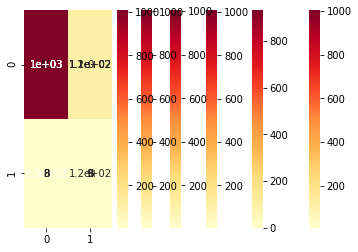

In [39]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X_res, y_res)
    print('\n')
    mR2 = cross_val_score(k,  X_res, y_res, cv=10, scoring = "accuracy").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X_res, y_res, cv=10, scoring = "accuracy").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

RandomForestClassifier is selected as a model for the target variable 'SARS-Cov-2_exam_result' as it is giving the best score among all the algorithms tested having r2 score = 0.92 at random state 70.

###### Results of different algorithms tested, when the TARGET VARIABLE is Patient_addmited_to_regular_ward

-------- LogisticRegression --------
Maximum Accuracy score is : 0.9937998228520815 achieved at : 71


Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1118
           1       0.40      0.55      0.46        11

    accuracy                           0.99      1129
   macro avg       0.70      0.77      0.73      1129
weighted avg       0.99      0.99      0.99      1129



Confusion Matrix :
 [[1109    9]
 [   5    6]]


ROC_AUC_CURVE : 0.7687022280045536


AxesSubplot(0.125,0.125;0.62x0.755)




Cross validation score (Mean r2 score): 0.9860042051088934
Standard Deviationin r2 score : 0.003208499058096547




-------- GaussianNB --------
Maximum Accuracy score is : 0.08857395925597875 achieved at : 63


Classification Report :
               precision    recall  f1-score   support

           0       0.05      1.00      0.09        53
           1       1.00      0.01      0.03      1076

    accuracy    

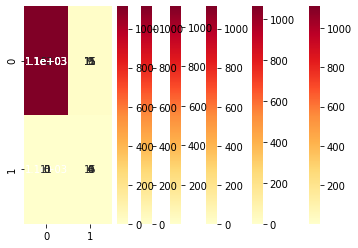

In [40]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X_regular, y_regular)
    print('\n')
    mR2 = cross_val_score(k,  X_regular, y_regular, cv=10, scoring = "accuracy").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X_regular, y_regular, cv=10, scoring = "accuracy").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

LogisticRegression is selected as a model for the target variable 'Patient_addmited_to_regular_ward_(1=yes,_0=no)' as it is giving the best score among all the algorithms tested having r2 score = 0.993 at random state 71.

###### Results of different algorithms tested, when the TARGET VARIABLE is Patient_addmited_to_semi-intensive_unit

-------- LogisticRegression --------
Maximum Accuracy score is : 0.995571302037201 achieved at : 81


Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1124
           1       0.25      0.60      0.35         5

    accuracy                           0.99      1129
   macro avg       0.62      0.80      0.67      1129
weighted avg       0.99      0.99      0.99      1129



Confusion Matrix :
 [[1115    9]
 [   2    3]]


ROC_AUC_CURVE : 0.7959964412811388


AxesSubplot(0.125,0.125;0.62x0.755)




Cross validation score (Mean r2 score): 0.9895462248164189
Standard Deviationin r2 score : 0.00407457383057932




-------- GaussianNB --------
Maximum Accuracy score is : 0.112488928255093 achieved at : 98


Classification Report :
               precision    recall  f1-score   support

           0       0.06      0.97      0.11        68
           1       0.83      0.01      0.02      1061

    accuracy        

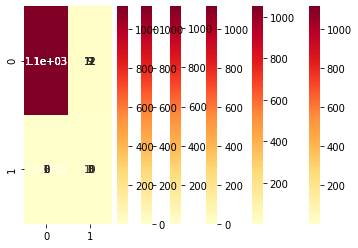

In [41]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X_semi, y_semi)
    print('\n')
    mR2 = cross_val_score(k,  X_semi, y_semi, cv=10, scoring = "accuracy").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X_semi, y_semi, cv=10, scoring = "accuracy").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

KNeighborsClassifier is selected as a model for the target variable 'Patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)' as it is giving the best score among all the algorithms tested having r2 score = 0.997 at random state 54.

###### Results of different algorithms tested, when the TARGET VARIABLE is Patient_addmited_to_intensive_care_unit

-------- LogisticRegression --------
Maximum Accuracy score is : 0.995571302037201 achieved at : 49


Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       0.17      0.33      0.22         3

    accuracy                           0.99      1129
   macro avg       0.58      0.66      0.61      1129
weighted avg       1.00      0.99      0.99      1129



Confusion Matrix :
 [[1121    5]
 [   2    1]]


ROC_AUC_CURVE : 0.6644464179988159


AxesSubplot(0.125,0.125;0.62x0.755)




Cross validation score (Mean r2 score): 0.9913189606477124
Standard Deviationin r2 score : 0.002678103197396006




-------- GaussianNB --------
Maximum Accuracy score is : 0.10363153232949512 achieved at : 84


Classification Report :
               precision    recall  f1-score   support

           0       0.07      0.99      0.13        77
           1       0.83      0.00      0.01      1052

    accuracy     

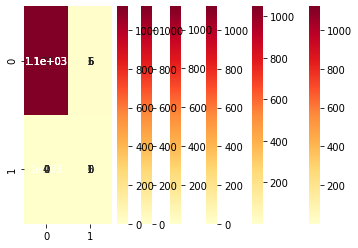

In [42]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, X_int, y_int)
    print('\n')
    mR2 = cross_val_score(k,  X_int, y_int, cv=10, scoring = "accuracy").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X_int, y_int, cv=10, scoring = "accuracy").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

RandomForestClassifier is selected as a model for the target variable 'Patient_addmited_to_intensive_care_unit_(1=yes,_0=no)' as it is giving the best score among all the algorithms tested having r2 score = 0.997 at random state 45.

In [52]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rfc, 'brazil_covid.pkl')

['brazil_covid.pkl']